In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv


In [96]:
PATH = '../input/new-york-city-taxi-fare-prediction/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
train = pd.read_csv(PATH + 'train.csv', nrows = 5000000)

In [38]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [39]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [40]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [41]:
train_cp = train.copy()

In [109]:
train = train_cp.copy()

In [110]:
train = train[train['fare_amount'] > 0]

In [111]:
train = train[train['passenger_count'] < 7]

In [112]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.999645e+06,4.999645e+06,4.999645e+06,4.999609e+06,4.999609e+06,4.999645e+06
mean,1.134193e+01,-7.250715e+01,3.991995e+01,-7.250674e+01,3.991760e+01,1.684370e+00
std,9.818979e+00,1.280884e+01,8.963256e+00,1.281513e+01,9.486277e+00,1.307861e+00
min,1.000000e-02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,6.000000e+00


In [113]:
#BB = (menor longitude, maior longitude, menor latitude, maior latitude)
def ajustar_cord(df, BB):
    return df[(df['pickup_longitude'] > BB[0]) & (df['pickup_longitude'] < BB[1]) & \
              (df['dropoff_latitude'] > BB[2]) & (df['dropoff_latitude'] < BB[3]) & \
              (df['dropoff_longitude'] > BB[0]) & (df['dropoff_longitude'] < BB[1]) & \
              (df['pickup_latitude'] > BB[2]) & (df['pickup_latitude'] < BB[3])
             ]

In [114]:
BB = ( -74.5189, -73.4409, 40.4590, 40.9348)
train = ajustar_cord(train, BB)

In [115]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [116]:
train.reset_index(inplace = True)

In [117]:
train.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.890257e+06,4.890257e+06,4.890257e+06,4.890257e+06,4.890257e+06,4.890257e+06,4.890257e+06
mean,2.499763e+06,1.130083e+01,-7.397548e+01,4.075083e+01,-7.397458e+01,4.075121e+01,1.684624e+00
std,1.443428e+06,9.561256e+00,3.486854e-02,2.697182e-02,3.458529e-02,3.081102e-02,1.307820e+00
min,0.000000e+00,1.000000e-02,-7.451037e+01,4.045954e+01,-7.451527e+01,4.045915e+01,0.000000e+00
25%,1.249589e+06,6.000000e+00,-7.399228e+01,4.073655e+01,-7.399158e+01,4.073559e+01,1.000000e+00
50%,2.499601e+06,8.500000e+00,-7.398211e+01,4.075334e+01,-7.398062e+01,4.075384e+01,1.000000e+00
75%,3.749922e+06,1.250000e+01,-7.396836e+01,4.076751e+01,-7.396540e+01,4.076839e+01,2.000000e+00
max,4.999999e+06,9.520000e+02,-7.344372e+01,4.093465e+01,-7.344160e+01,4.093476e+01,6.000000e+00


In [140]:
def plotar_no_mapa(df, BB, ny_mapa, alpha = 0.2, s=4):
    fig, axs = plt.subplots(2, 1, figsize = (32, 20))
    axs[0].scatter(df['pickup_longitude'], df['pickup_latitude'], zorder=1, alpha = alpha, c='b', s=s)
    axs[0].set_xlim(BB[0], BB[1])
    axs[0].set_ylim(BB[2], BB[3])
    axs[0].set_title('Pontos de partida')
    axs[0].imshow(ny_mapa, zorder = 0, extent = BB)
    
    axs[1].scatter(df['dropoff_longitude'], df['dropoff_latitude'], zorder=1, alpha = alpha, c='b', s=s)
    axs[1].set_xlim(BB[0], BB[1])
    axs[1].set_ylim(BB[2], BB[3])
    axs[1].set_title('Pontos de saida')
    axs[1].imshow(ny_mapa, zorder = 0, extent = BB)
    
    plt.show()

In [119]:
#imagem retirada do https://www.openstreetmap.org/
img_ny = plt.imread('../input/fare-nyc-prediction/map_nyc.png')

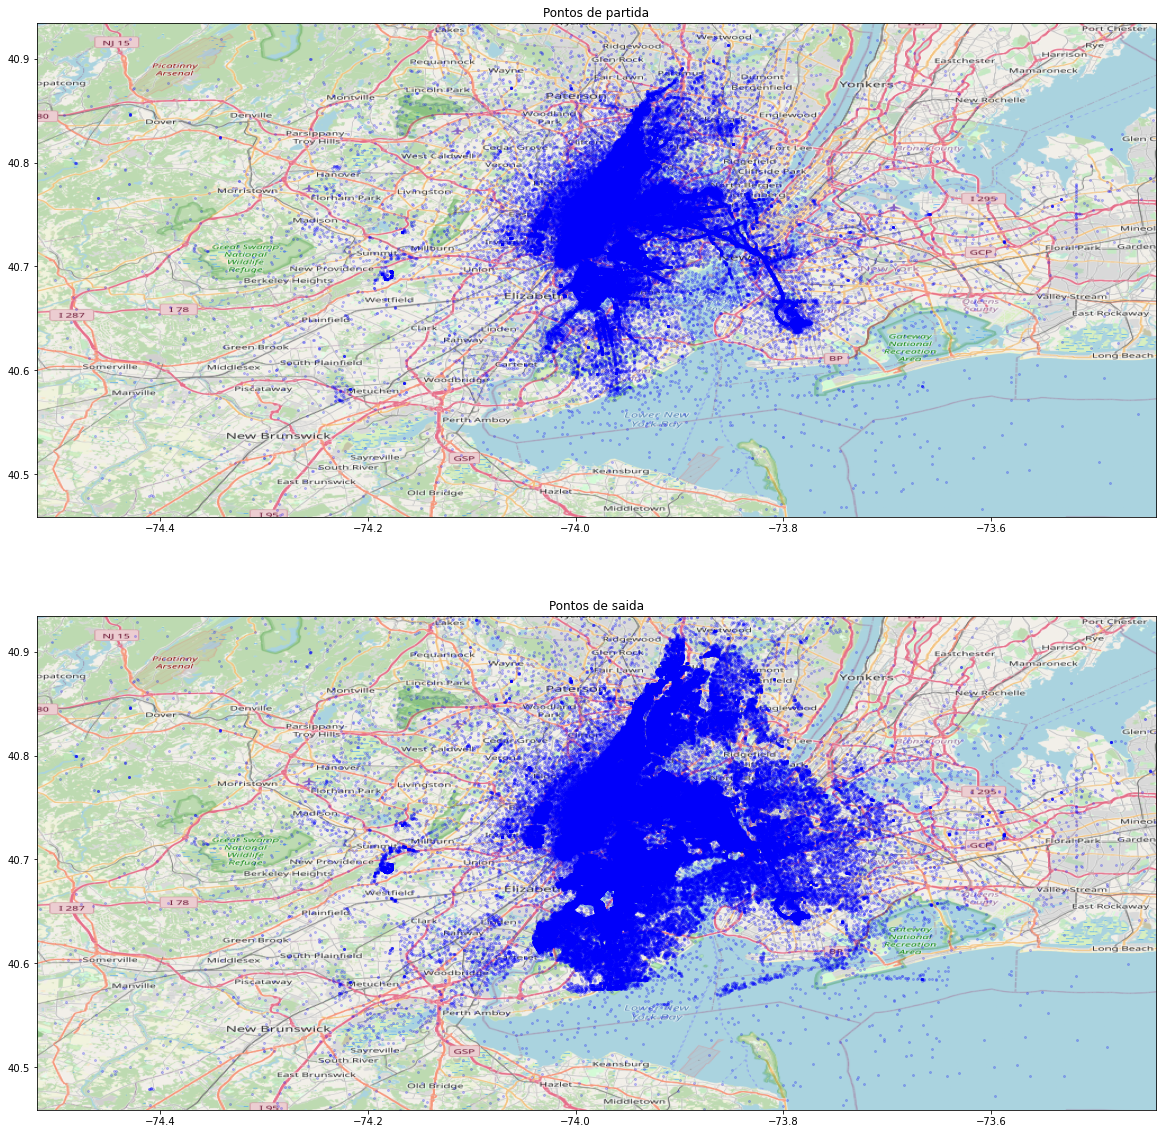

In [141]:
plotar_no_mapa(train, BB, img_ny)